## Plotting the circuit to execute the SWAP operation for one or more iteration

We propose the usage of Heisenberg evolution to perform the 2 qubit SWAP gate for duration $\delta t$ using the ZZ gate. By applying two Hadamard gates onto each qubit, we can get the XX gate:
\begin{align}
    &(H \otimes H) e^{-itZ\otimes Z} (H \otimes H) \\
    = &e^{-it(H \otimes H)(Z\otimes Z)(H \otimes H)} = e^{-itX\otimes X}
\end{align}

Similarly, we can achieve the YY gate by applying $S^\dagger$ gate followed by Hadamard gate:
\begin{align}
    & (SH \otimes SH) e^{-itZ\otimes Z}  [(H S^\dagger) \otimes (H S^\dagger)] \\
    = &e^{-it(SH \otimes SH)(Z\otimes Z)[(H S^\dagger) \otimes (H S^\dagger)]} = e^{-itY\otimes Y}
\end{align}

Because ZZ, YY and XX commute, we can achieve the SWAP operation by doing:
\begin{align}
    e^{-itSWAP} &=e^{-it(Z\otimes Z + Y\otimes Y + X\otimes X)}\\
    &= e^{-itZ\otimes Z}e^{-itY\otimes Y}e^{-itX\otimes X}\\
    &= e^{-itZ\otimes Z} (SH \otimes SH) e^{-itZ\otimes Z}
    [(H S^\dagger) \otimes (H S^\dagger)]
    (H \otimes H) e^{-itZ\otimes Z} (H \otimes H) \\
    &= e^{-itZ\otimes Z} (SH \otimes SH) e^{-itZ\otimes Z}
    [(HS^\dagger H) \otimes (HS^\dagger H)] e^{-itZ\otimes Z} (H \otimes H)
\end{align}

## DME Circuit

In [15]:
from qiskit.circuit.library import CXGate, SwapGate

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Admin\AppData\Local\Temp\ipykernel_4832\4252291034.py:8: SyntaxWarning: invalid escape sequence '\p'
  phi = Parameter('\phi')


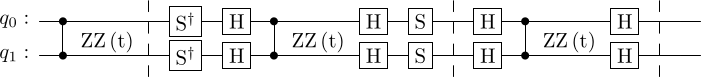

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RZZGate
from qiskit.circuit import Gate

# Create a parameter for the angle
t = Parameter('t')
phi = Parameter('\phi')

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)

# ZZ gate with the symbolic parameter t
qc.append(RZZGate(t), [0, 1])
qc.barrier()

# YY gate
qc.sdg(0)
qc.sdg(1)
qc.h(0)
qc.h(1)
qc.append(RZZGate(t), [0, 1])
qc.h(0)
qc.h(1)
qc.s(0)
qc.s(1)

qc.barrier()

# XX gate
qc.h(0)
qc.h(1)
qc.append(RZZGate(t), [0, 1])
qc.h(0)
qc.h(1)

qc.barrier()

# Draw the circuit with the parameter t
qc.draw(output='latex', style="bw")


In [2]:
latex_code = qc.draw(output='latex_source', style="bw")
print(latex_code)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \ctrl{1} & \dstick{\hspace{2.0em}\mathrm{ZZ}\,(\mathrm{t})} \qw & \qw & \qw \barrier[0em]{1} & \qw & \gate{\mathrm{S^\dagger}} & \gate{\mathrm{H}} & \ctrl{1} & \dstick{\hspace{2.0em}\mathrm{ZZ}\,(\mathrm{t})} \qw & \qw & \qw & \gate{\mathrm{H}} & \gate{\mathrm{S}} \barrier[0em]{1} & \qw & \gate{\mathrm{H}} & \ctrl{1} & \dstick{\hspace{2.0em}\mathrm{ZZ}\,(\mathrm{t})} \qw & \qw & \qw & \gate{\mathrm{H}} \barrier[0em]{1} & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \control \qw & \qw & \qw & \qw & \qw & \gate{\mathrm{S^\dagger}} & \gate{\mathrm{H}} & \control \qw & \qw & \qw & \qw & \gate{\mathrm{H}} & \gate{\mathrm{S}} & \qw & \gate{\mathrm{H}} & \control \qw & \qw & \qw & \qw & \gate{\mathrm{H}} & \qw & \qw & \qw\\
\\ }}
\end{document}


\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \ctrl{1} & \dstick{\hspace{2.0em}\mathrm{ZZ}\,(\mathrm{\delta\,t})} \qw & \qw & \qw \barrier[0em]{1} & \qw & \gate{\mathrm{S^\dagger}} & \gate{\mathrm{H}} & \ctrl{1} & \dstick{\hspace{2.0em}\mathrm{ZZ}\,(\mathrm{\delta\,t})} \qw & \qw & \qw & \gate{\mathrm{H}} & \gate{\mathrm{S}} \barrier[0em]{1} & \qw & \gate{\mathrm{H}} & \ctrl{1} & \dstick{\hspace{2.0em}\mathrm{ZZ}\,(\mathrm{\delta\,t})} \qw & \qw & \qw & \gate{\mathrm{H}} \barrier[0em]{1} & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \control \qw & \qw & \qw & \qw & \qw & \gate{\mathrm{S^\dagger}} & \gate{\mathrm{H}} & \control \qw & \qw & \qw & \qw & \gate{\mathrm{H}} & \gate{\mathrm{S}} & \qw & \gate{\mathrm{H}} & \control \qw & \qw & \qw & \qw & \gate{\mathrm{H}} & \qw & \qw & \qw\\
\\ }}

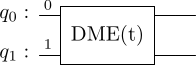

In [3]:
# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)

# Define a custom 2-qubit gate called 'DME'
dme_gate = Gate(name=r'DME({t})', num_qubits=2, params=[])
qc.append(dme_gate, [0, 1])  # DME gate on q_0 and q_1

# Draw the circuit
qc.draw(output='latex', style="bw")

In [4]:
latex_code = qc.draw(output='latex_source', style="bw")
print(latex_code)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=1.0em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \multigate{1}{\mathrm{DME({t})}}_<<<{0} & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \ghost{\mathrm{DME({t})}}_<<<{1} & \qw & \qw\\
\\ }}
\end{document}


\scalebox{1.0}{
\Qcircuit @C=1.0em @R=1.0em @!R { \\
	 	\nghost{{q}_{0} :  }  & \multigate{1}{\mathrm{DME({\tau})}}_<<<{0} & \qw & \qw\\
	 	\nghost{{q}_{1} :  }  & \ghost{\mathrm{DME({\tau})}}_<<<{1} & \qw & \qw\\
\\ }}

## Circuit A

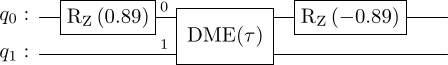

In [5]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)

# Define a custom 2-qubit gate called 'DME'
dme_gate = Gate(name=r'DME({\tau})', num_qubits=2, params=[])
phi_z = 0.89

# Apply the gates as per the given description
qc.rz(phi=phi_z,qubit=0)
qc.append(dme_gate, [0, 1])  # DME gate on q_0 and q_1
# qc.append(dme_gate, [0, 2])  # DME gate on q_0 and q_2
# qc.append(dme_gate, [0, 3])  # DME gate on q_0 and q_3
qc.rz(phi=-phi_z,qubit=0)

# Draw the circuit
qc.draw(output='latex', style="bw")


In [6]:
latex_code = qc.draw(output='latex_source', style="bw")
print(latex_code)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{R_Z}\,(\mathrm{0.89})} & \multigate{1}{\mathrm{DME({\tau})}}_<<<{0} & \gate{\mathrm{R_Z}\,(\mathrm{-0.89})} & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \qw & \ghost{\mathrm{DME({\tau})}}_<<<{1} & \qw & \qw & \qw\\
\\ }}
\end{document}


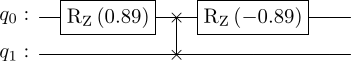

In [26]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)

# Define a custom 2-qubit gate called 'DME'
dme_gate = Gate(name=r'DME({\tau})', num_qubits=2, params=[])
phi_z = 0.89

# Apply the gates as per the given description
qc.rz(phi=phi_z,qubit=0)
qc.append(SwapGate(), [0, 1])  # DME gate on q_0 and q_1
# qc.append(dme_gate, [0, 2])  # DME gate on q_0 and q_2
# qc.append(dme_gate, [0, 3])  # DME gate on q_0 and q_3
qc.rz(phi=-phi_z,qubit=0)

# Draw the circuit
qc.draw(output='latex', style="bw")


In [27]:
latex_code = qc.draw(output='latex_source', style="bw")
print(latex_code)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{R_Z}\,(\mathrm{0.89})} & \qswap & \gate{\mathrm{R_Z}\,(\mathrm{-0.89})} & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \qw & \qswap \qwx[-1] & \qw & \qw & \qw\\
\\ }}
\end{document}


## Circuit C

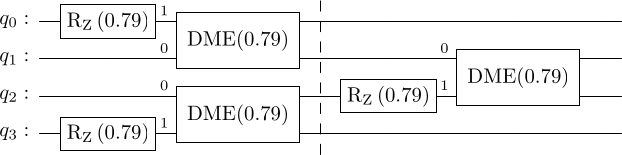

In [4]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate

# Create a quantum circuit with two qubits
qc = QuantumCircuit(4)

# Define a custom 2-qubit gate called 'DME'
dme_gate = Gate(name=r'DME({0.79})', num_qubits=2, params=[])
phi_z = 0.79

# Apply the gates as per the given description
qc.rz(phi=phi_z,qubit=0)
qc.append(dme_gate, [1, 0])  # DME gate on q_0 and q_1
# qc.rz(phi=-phi_z,qubit=1)

# Apply the gates as per the given description
qc.rz(phi=phi_z,qubit=3)
qc.append(dme_gate, [2, 3])  # DME gate on q_2 and q_3
# qc.rz(phi=-phi_z,qubit=2)
qc.barrier()


dme_gate = Gate(name=r'DME({0.79})', num_qubits=2, params=[])
qc.rz(phi=phi_z,qubit=2)
qc.append(dme_gate, [1, 2])  # DME gate on q_0 and q_1
# qc.rz(phi=-phi_z,qubit=1)


# Draw the circuit
qc.draw(output='latex', style="bw")

In [5]:
latex_code = qc.draw(output='latex_source', style="bw")
print(latex_code)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{R_Z}\,(\mathrm{0.79})} & \multigate{1}{\mathrm{DME({0.79})}}_<<<{1} \barrier[0em]{3} & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \qw & \ghost{\mathrm{DME({0.79})}}_<<<{0} & \qw & \qw & \multigate{1}{\mathrm{DME({0.79})}}_<<<{0} & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \qw & \multigate{1}{\mathrm{DME({0.79})}}_<<<{0} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{0.79})} & \ghost{\mathrm{DME({0.79})}}_<<<{1} & \qw & \qw\\
	 	\nghost{{q}_{3} :  } & \lstick{{q}_{3} :  } & \gate{\mathrm{R_Z}\,(\mathrm{0.79})} & \ghost{\mathrm{DME({0.79})}}_<<<{1} & \qw & \qw & \qw & \qw & \qw\\
\\ }}
\end{document}


In [28]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate

# Create a quantum circuit with two qubits
qc = QuantumCircuit(4)

# Define a custom 2-qubit gate called 'DME'
dme_gate = Gate(name=r'DME({\tau})', num_qubits=2, params=[])
phi_z = 0.89

# Apply the gates as per the given description
qc.rz(phi=phi_z,qubit=1)
qc.append(SwapGate(), [1, 0])  # DME gate on q_0 and q_1
qc.rz(phi=-phi_z,qubit=1)

# Apply the gates as per the given description
qc.rz(phi=phi_z,qubit=2)
qc.append(SwapGate(), [2, 3])  # DME gate on q_2 and q_3
qc.rz(phi=-phi_z,qubit=2)
qc.barrier()


dme_gate = Gate(name=r'DME({0.14\tau})', num_qubits=2, params=[])
qc.rz(phi=phi_z,qubit=1)
qc.append(dme_gate, [1, 2])  # DME gate on q_0 and q_1
qc.rz(phi=-phi_z,qubit=1)


# Draw the circuit
qc.draw(output='latex', style="bw")

In [29]:
latex_code = qc.draw(output='latex_source', style="bw")
print(latex_code)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \qw & \qswap \qwx[1] & \qw \barrier[0em]{3} & \qw & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{R_Z}\,(\mathrm{0.89})} & \qswap & \gate{\mathrm{R_Z}\,(\mathrm{-0.89})} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{0.89})} & \multigate{1}{\mathrm{DME({0.14\tau})}}_<<<{0} & \gate{\mathrm{R_Z}\,(\mathrm{-0.89})} & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{R_Z}\,(\mathrm{0.89})} & \qswap & \gate{\mathrm{R_Z}\,(\mathrm{-0.89})} & \qw & \qw & \ghost{\mathrm{DME({0.14\tau})}}_<<<{1} & \qw & \qw & \qw\\
	 	\nghost{{q}_{3} :  } & \lstick{{q}_{3} :  } & \qw & \qswap \qwx[-1] & \qw & \qw & \qw & \qw & \qw & \qw & \qw\\
\\ }}
\end{document}


## Circuit B

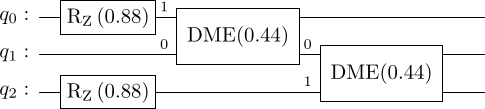

In [9]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate

# Create a quantum circuit with two qubits
qc = QuantumCircuit(3)

# Define a custom 2-qubit gate called 'DME'
dme_gate = Gate(name=r'DME({0.44})', num_qubits=2, params=[])
phi_z = 0.88

# Apply the gates as per the given description
qc.rz(phi=phi_z,qubit=0)
qc.rz(phi=phi_z,qubit=2)
qc.append(dme_gate, [1, 0])  # DME gate on q_0 and q_1
qc.append(dme_gate, [1, 2])  # DME gate on q_0 and q_2
# qc.rz(phi=-phi_z,qubit=1)


# Draw the circuit
qc.draw(output='latex', style="bw")

In [10]:
latex_code = qc.draw(output='latex_source', style="bw")
print(latex_code)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{R_Z}\,(\mathrm{0.88})} & \multigate{1}{\mathrm{DME({0.44})}}_<<<{1} & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \qw & \ghost{\mathrm{DME({0.44})}}_<<<{0} & \multigate{1}{\mathrm{DME({0.44})}}_<<<{0} & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{R_Z}\,(\mathrm{0.88})} & \qw & \ghost{\mathrm{DME({0.44})}}_<<<{1} & \qw & \qw\\
\\ }}
\end{document}


## Circuit B (3 part)

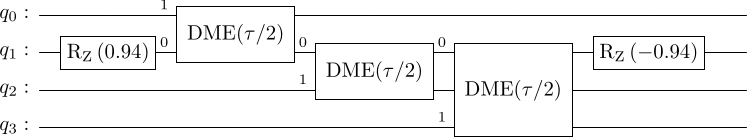

In [11]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate

# Create a quantum circuit with two qubits
qc = QuantumCircuit(4)

# Define a custom 2-qubit gate called 'DME'
dme_gate = Gate(name=r'DME({\tau/2})', num_qubits=2, params=[])
phi_z = 0.94

# Apply the gates as per the given description
qc.rz(phi=phi_z,qubit=1)
qc.append(dme_gate, [1, 0])  # DME gate on q_0 and q_1
qc.append(dme_gate, [1, 2])  # DME gate on q_0 and q_2
qc.append(dme_gate, [1, 3])  # DME gate on q_0 and q_2
qc.rz(phi=-phi_z,qubit=1)


# Draw the circuit
qc.draw(output='latex', style="bw")

In [12]:
latex_code = qc.draw(output='latex_source', style="bw")
print(latex_code)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \qw & \multigate{1}{\mathrm{DME({\tau/2})}}_<<<{1} & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{R_Z}\,(\mathrm{0.94})} & \ghost{\mathrm{DME({\tau/2})}}_<<<{0} & \multigate{1}{\mathrm{DME({\tau/2})}}_<<<{0} & \multigate{2}{\mathrm{DME({\tau/2})}}_<<<{0} & \gate{\mathrm{R_Z}\,(\mathrm{-0.94})} & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \qw & \qw & \ghost{\mathrm{DME({\tau/2})}}_<<<{1} & \ghost{\mathrm{DME({\tau/2})}} & \qw & \qw & \qw\\
	 	\nghost{{q}_{3} :  } & \lstick{{q}_{3} :  } & \qw & \qw & \qw & \ghost{\mathrm{DME({\tau/2})}}_<<<{1} & \qw & \qw & \qw\\
\\ }}
\end{document}


## HBAC

In [24]:
qc = QuantumCircuit(3)
qc.append(SwapGate(),[0, 2])
qc.append(SwapGate(),[1, 2])
qc.append(CXGate(),[0,1])
qc.ccx(2, 1, 0)
qc.append(CXGate(),[0,1])
# Draw the circuit
qc.draw(output='latex', style="bw")

In [25]:
latex_code = qc.draw(output='latex_source', style="bw")
print(latex_code)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.8em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \qswap & \qw & \ctrl{1} & \targ & \ctrl{1} & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \qw & \qswap & \targ & \ctrl{-1} & \targ & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \qswap \qwx[-2] & \qswap \qwx[-1] & \qw & \ctrl{-1} & \qw & \qw & \qw\\
\\ }}
\end{document}
